## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [42]:
df = pd.read_csv('data/human_body_temperature.csv')

In [43]:
df.head()

temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0

In [44]:
df.temperature.head()

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64

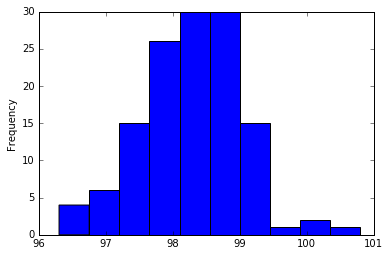

In [45]:
df.temperature.plot(kind='hist')

Body temperature distribution can be said to be normal, although it looks like slightly asymmetric.

In [46]:
df.temperature.mean(), df.temperature.std()

(98.24923076923078, 0.7331831580389454)

In [47]:
df.temperature[df.gender=='F'].mean(), df.temperature[df.gender=='F'].std(), len(df.temperature[df.gender=='F'])

(98.39384615384613, 0.7434877527313665, 65)

In [48]:
df.temperature[df.gender=='M'].mean(), df.temperature[df.gender=='M'].std(), len(df.temperature[df.gender=='M'])

(98.1046153846154, 0.6987557623265908, 65)

Is the true population mean really 98.6 degrees F?
We need a one sample hypothesis test. In this situation, sample size is > 30, t and z test should give similar results. Because the population standard deviation is not known, we are going to use t-test.

Let the null hypothesis be : The true population mean is 98.6 degrees F. 

In [49]:
len(df.temperature)

130

In [50]:
len(df.temperature[df.temperature>=98.6])

49

In [51]:
len(df.temperature[df.temperature>=98.6])*100./len(df.temperature)

37.69230769230769

In [52]:
len(df.temperature[df.temperature>=98.2])*100./len(df.temperature)

58.46153846153846

In [53]:
abs(98.6-df.temperature.mean())/ (df.temperature.std()/np.sqrt(len(df.temperature))) #population mean is 98.6

5.4548232923640789

In [54]:
#ttest_1samp calculates the T-test for the mean of ONE group of scores.
#This is a two-sided test for the null hypothesis that the expected value (mean) of a sample 
#of independent observations is equal to the given population mean.
scipy.stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The p-value is very small and we have to reject the null hypothesis. 

In [59]:
#scipy.stats.ttest_1samp(df.temperature, 98.1)

At what temperature should we consider someone's temperature to be "abnormal"?

In [61]:
mean, sigma = df.temperature.mean(), df.temperature.std()
conf_int = scipy.stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int

(96.812218185403111, 99.686243353058444)

In [64]:
mean, sigma_samp = df.temperature.mean(), df.temperature.std()/np.sqrt(len(df.temperature))
conf_int2 = scipy.stats.norm.interval(0.95, loc=mean, scale=sigma_samp)
conf_int2 #WHICH CONFIDENCE INTERVAL TO USE?

(98.123196428181657, 98.375265110279898)

**I am not sure about this.**
If the temerature is found to be around 1.5 F far from the sample mean, we may say it is abnormal. Several entries of the sample had a temperature that is above 98.6 F. And as we can see above that is entirely normal as it was only 0.4 F away from the sample mean. But remember we were trying to estimate the mean temperature, and the sample mean is so far away from 98.6 that it is unlikely that the population mean is 98.6 F.

Is there a significant difference between males and females in normal temperature?

In [57]:
f_m = df.temperature[df.gender=='F'].mean()
f_sd = df.temperature[df.gender=='F'].std()
m_m = df.temperature[df.gender=='M'].mean()
m_sd = df.temperature[df.gender=='M'].std()
f_m, f_sd, m_m, m_sd

(98.39384615384613, 0.7434877527313665, 98.1046153846154, 0.6987557623265908)

Null hypothesis: no difference. So difference of population means for male and female body temperature is zero.

In [58]:
scipy.stats.ttest_ind(df.temperature[df.gender=='F'],df.temperature[df.gender=='M'], 0) #two independent samples

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

The p-value is around 2%. We can reject the hypothesis with 95% confidence. So male and female body temperature is different.